In [38]:
import requests
import pandas as pd
import json
import datetime as dt
import geopandas as gpd
import matplotlib.pyplot as plt

In [39]:
#requesting data for the price of rice in EU member states
riceprice=requests.get("https://www.ec.europa.eu/agrifood/api/rice/prices?")

In [151]:
#Raw Data got from the request
df_riceprice=pd.DataFrame(riceprice.json())
display(df_riceprice)

,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
0,IT,Italy,01/11/2004,07/11/2004,10,€183.00,Tonne,2004/2005,Paddy,Japonica,Lido
1,IT,Italy,17/12/2007,23/12/2007,16,€298.00,Tonne,2007/2008,Paddy,Japonica,Lido
2,IT,Italy,25/02/2008,02/03/2008,26,€318.00,Tonne,2007/2008,Paddy,Japonica,Lido
3,IT,Italy,28/01/2008,03/02/2008,22,€298.00,Tonne,2007/2008,Paddy,Japonica,Lido
4,IT,Italy,28/05/2007,03/06/2007,39,€286.00,Tonne,2006/2007,Paddy,Japonica,Lido
...,...,...,...,...,...,...,...,...,...,...,...
19171,ES,Spain,19/09/2016,25/09/2016,4,€716.34,Tonne,2016/2017,Milled parboiled,Indica,Not informed
19172,ES,Spain,30/05/2016,05/06/2016,40,€716.28,Tonne,2015/2016,Milled parboiled,Indica,Not informed
19173,ES,Spain,14/11/2016,20/11/2016,12,€745.96,Tonne,2016/2017,Milled parboiled,Indica,Not informed
19174,ES,Spain,07/11/2016,13/11/2016,11,€745.96,Tonne,2016/2017,Milled parboiled,Indica,Not informed


In [152]:
#Data filtering 
df_riceprice["price"]=df_riceprice["price"].str.replace("€","") # removing the € character in price column
df_riceprice["price"]=pd.to_numeric(df_riceprice["price"])   # changing price data into numeric data type
display(df_riceprice.head())

,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
0,IT,Italy,01/11/2004,07/11/2004,10,183.0,Tonne,2004/2005,Paddy,Japonica,Lido
1,IT,Italy,17/12/2007,23/12/2007,16,298.0,Tonne,2007/2008,Paddy,Japonica,Lido
2,IT,Italy,25/02/2008,02/03/2008,26,318.0,Tonne,2007/2008,Paddy,Japonica,Lido
3,IT,Italy,28/01/2008,03/02/2008,22,298.0,Tonne,2007/2008,Paddy,Japonica,Lido
4,IT,Italy,28/05/2007,03/06/2007,39,286.0,Tonne,2006/2007,Paddy,Japonica,Lido


In [155]:
# formating the beginDate and endDate into Datetime data type
df_riceprice["beginDate"]=pd.to_datetime(df_riceprice["beginDate"],yearfirst=True)
df_riceprice["endDate"]=pd.to_datetime(df_riceprice["endDate"],yearfirst=True)
display(df_riceprice.info())
df_riceprice.set_index(df_riceprice["beginDate"],inplace=True)
df_riceprice.drop(columns=["beginDate"],inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19176 entries, 0 to 19175
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   memberStateCode  19176 non-null  object        
 1   memberStateName  19176 non-null  object        
 2   beginDate        19176 non-null  datetime64[ns]
 3   endDate          19176 non-null  datetime64[ns]
 4   weekNumber       19176 non-null  int64         
 5   price            19176 non-null  float64       
 6   unit             19176 non-null  object        
 7   marketingYear    19176 non-null  object        
 8   stage            19176 non-null  object        
 9   type             19176 non-null  object        
 10  variety          19176 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 1.6+ MB


None

In [156]:

##filtering data for year 2020
df_riceprice2020=df_riceprice["2020-01-01":"2021-01-01"].sort_index()
display(df_riceprice2020)

C:\Users\thapa\AppData\Local\Temp\ipykernel_7924\2953025280.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_riceprice2020=df_riceprice["2020-01-01":"2021-01-01"].sort_index()


,memberStateCode,memberStateName,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
beginDate,,,,,,,,,,
2020-01-06,ES,Spain,2020-07-06,40,484.80,Tonne,2019/2020,Milled non parboiled,Indica,Average
2020-01-06,IT,Italy,2020-07-06,40,990.00,Tonne,2019/2020,Milled parboiled,Japonica,Ribe
2020-01-06,EL,Greece,2020-07-06,40,353.00,Tonne,2019/2020,Paddy,Indica,Not informed
2020-01-06,FR,France,2020-07-06,40,603.33,Tonne,2019/2020,Milled non parboiled,Japonica,Rond
2020-01-06,ES,Spain,2020-07-06,40,625.64,Tonne,2019/2020,Milled parboiled,Indica,Average
...,...,...,...,...,...,...,...,...,...,...
2020-12-28,ES,Spain,2021-03-01,18,577.78,Tonne,2020/2021,Milled non parboiled,Indica,Average
2020-12-28,IT,Italy,2021-03-01,18,800.00,Tonne,2020/2021,Milled parboiled,Indica,Long B
2020-12-28,PT,Portugal,2021-03-01,18,362.10,Tonne,2020/2021,Paddy,Japonica,Long A


In [157]:
avg_price_country=df_riceprice2020.groupby(["memberStateName"]).mean().drop(columns={"weekNumber"})
display(avg_price_country)

,price
memberStateName,
Bulgaria,548.367212
France,584.333556
Greece,455.729452
Italy,667.248189
Portugal,358.695333
Spain,475.537808


In [158]:
df_riceprice2020["memberStateName"].value_counts()

Spain       260
Italy       243
Greece      146
Bulgaria    104
France       45
Portugal     15
Name: memberStateName, dtype: int64

In [159]:
df_riceprice2020.query("memberStateName=='Spain'")

,memberStateCode,memberStateName,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
beginDate,,,,,,,,,,
2020-01-06,ES,Spain,2020-07-06,40,484.80,Tonne,2019/2020,Milled non parboiled,Indica,Average
2020-01-06,ES,Spain,2020-07-06,40,625.64,Tonne,2019/2020,Milled parboiled,Indica,Average
2020-01-06,ES,Spain,2020-07-06,40,342.19,Tonne,2019/2020,Paddy,Indica,Average
2020-01-06,ES,Spain,2020-07-06,40,593.93,Tonne,2019/2020,Milled non parboiled,Japonica,Average
2020-01-06,ES,Spain,2020-07-06,40,337.77,Tonne,2019/2020,Paddy,Japonica,Average
...,...,...,...,...,...,...,...,...,...,...
2020-12-28,ES,Spain,2021-03-01,18,309.75,Tonne,2020/2021,Paddy,Indica,Average
2020-12-28,ES,Spain,2021-03-01,18,603.99,Tonne,2020/2021,Milled non parboiled,Japonica,Average
2020-12-28,ES,Spain,2021-03-01,18,325.32,Tonne,2020/2021,Paddy,Japonica,Average


In [160]:
#filtering data for year 2019, 2001, 2010 and displaying all unique values in weekNumber
df_riceprice2019=df_riceprice["2019-01-01":"2020-01-01"].sort_index()
df_riceprice2001=df_riceprice["2001-01-01":"2002-01-01"].sort_index()
df_riceprice2010=df_riceprice["2010-01-01":"2011-01-01"].sort_index()
display(df_riceprice2019.query("memberStateName=='Spain'").sort_values("weekNumber")["weekNumber"].unique())
display(df_riceprice2020.query("memberStateName=='Spain'").sort_values("weekNumber")["weekNumber"].unique())
display(df_riceprice2001.query("memberStateName=='Spain'").sort_values("weekNumber")["weekNumber"].unique())
display(df_riceprice2010.query("memberStateName=='Spain'").sort_values("weekNumber")["weekNumber"].unique())



C:\Users\thapa\AppData\Local\Temp\ipykernel_7924\2162592227.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_riceprice2019=df_riceprice["2019-01-01":"2020-01-01"].sort_index()
C:\Users\thapa\AppData\Local\Temp\ipykernel_7924\2162592227.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_riceprice2010=df_riceprice["2010-01-01":"2011-01-01"].sort_index()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52], dtype=int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52], dtype=int64)

array([ 2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48], dtype=int64)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52], dtype=int64)

In [161]:
#grouby memberStateName and grouby year
#avg_price_country=df_riceprice2020.groupby(["memberStateName"]).mean().drop(columns={"weekNumber"})
#display(avg_price_country)
#df_riceprice.groupby(["memberStateName"])
grouped_df=df_riceprice.groupby(["memberStateName","beginDate"])["price"].mean()
df_grouped=pd.DataFrame(grouped_df).sort_values("beginDate")
df_grouped.groupby(["memberStateName","beginDate"])

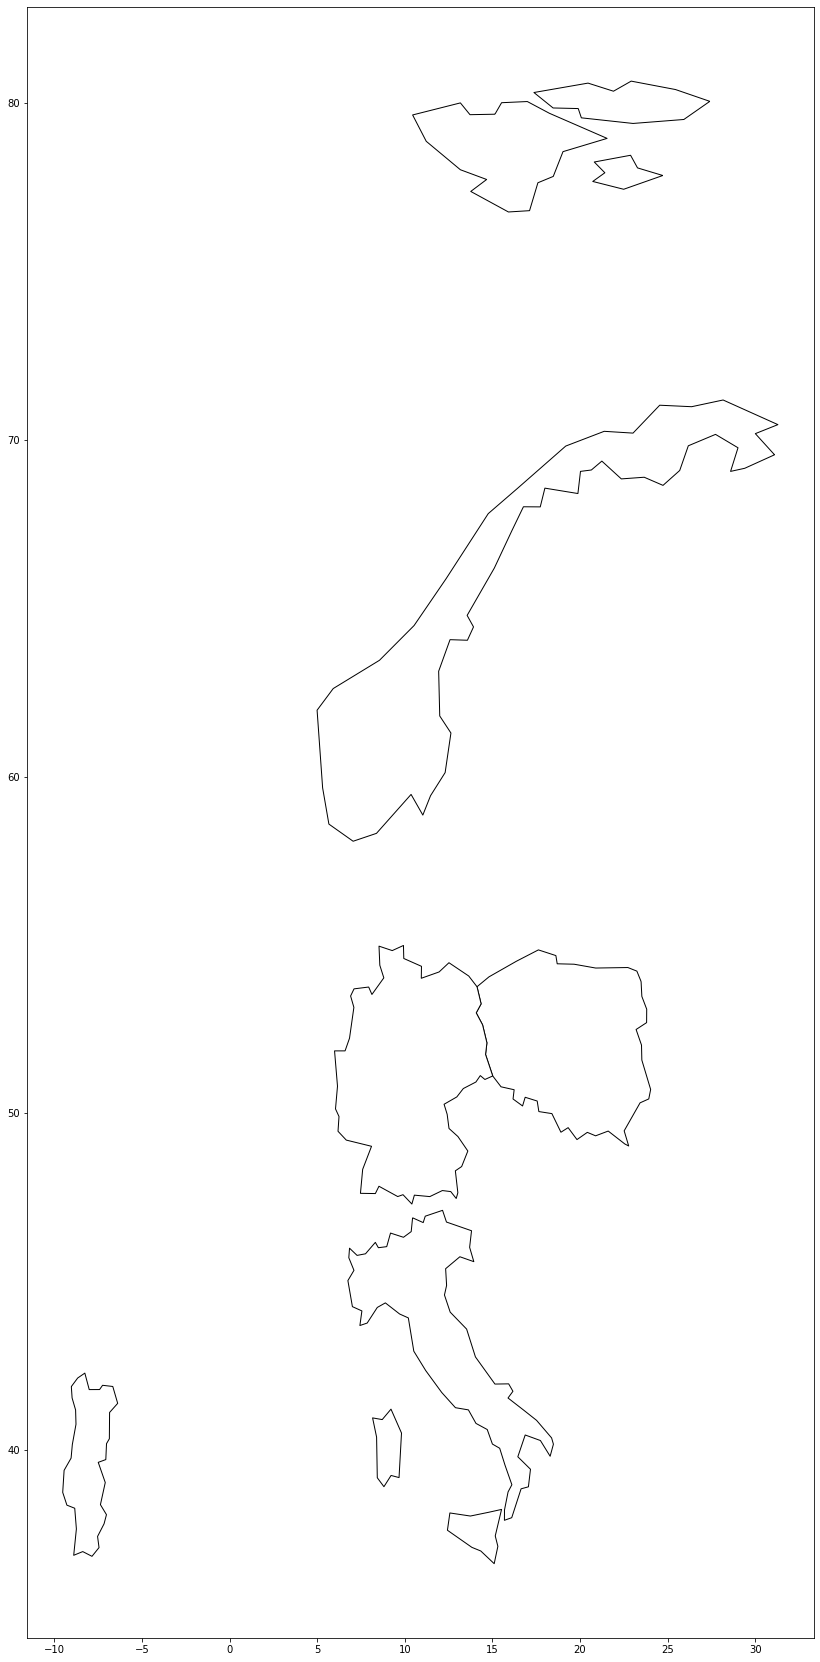

In [48]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.query("continent=='Europe'").query(f"name=={'Norway','Portugal','Italy','Germany','Poland'}").plot(color='white',edgecolor='black',figsize=(20,30)), 
figsize = (15,20)

Text(0.5, 74.43361717965095, 'Longitude')

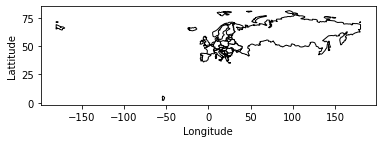

In [49]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#data = pd.read_csv("Repair_yards_africa.csv")

base = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')

#data['Coordinates'] = list(zip(data.lon, data.lat))
#data['Coordinates'] = data['Coordinates'].apply(Point)
#geodata = gpd.GeoDataFrame(data, geometry='Coordinates')
#geodata.plot(ax=base, color='red', markersize=11)
plt.ylabel('Lattitude')
plt.xlabel('Longitude')